In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farhanpravej","key":"9902812cb7a201f84baf20d6e51b3e19"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia
!unzip -q chest-xray-pneumonia.zip

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:24<00:00, 148MB/s]
100% 2.29G/2.29G [00:24<00:00, 99.6MB/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set up paths
train_path = '/content/chest_xray/train'
val_path = '/content/chest_xray/val'
test_path = '/content/chest_xray/test'

# Create data generators
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

val_gen = datagen.flow_from_directory(
    val_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_gen = datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(1, activation='sigmoid')  # binary classification
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 276s 2s/step - accuracy: 0.8233 - loss: 0.3851 - val_accuracy: 0.6875 - val_loss: 0.6043
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 319s 2s/step - accuracy: 0.9539 - loss: 0.1352 - val_accuracy: 0.9375 - val_loss: 0.2104
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 269s 2s/step - accuracy: 0.9596 - loss: 0.1128 - val_accuracy: 1.0000 - val_loss: 0.1816
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 270s 2s/step - accuracy: 0.9713 - loss: 0.0884 - val_accuracy: 0.8125 - val_loss: 0.3103
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.9786 - loss: 0.0620 - val_accuracy: 0.8125 - val_loss: 0.2026
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 267s 2s/step - accuracy: 0.9808 - loss: 0.0559 - val_accuracy: 0.9375 - val_loss: 0.1830
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 322s 2s/step - accuracy: 0.9825 - loss: 0.0505 - val_accuracy: 0.9375 - val_loss: 0.0710
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9880 - loss: 0.0322 - val_accu

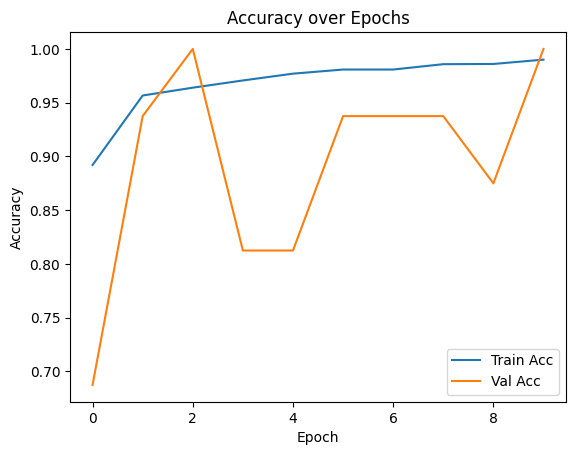

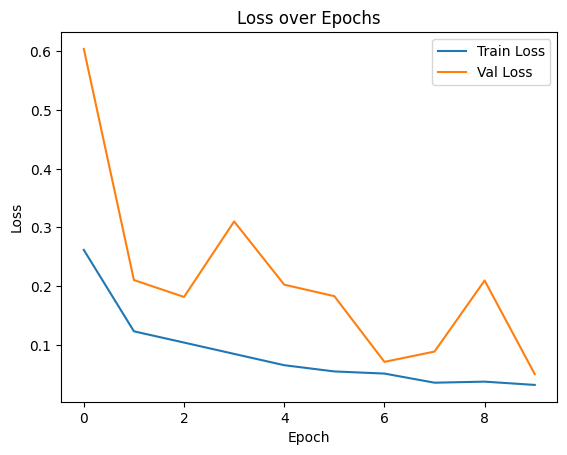

In [8]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions
test_gen.reset()
pred = (model.predict(test_gen) > 0.5).astype("int32")
true = test_gen.classes

# Confusion matrix & report
print(confusion_matrix(true, pred))
print(classification_report(true, pred, target_names=['Normal', 'Pneumonia']))


20/20 ━━━━━━━━━━━━━━━━━━━━ 14s 661ms/step
[[ 41 193]
 [ 69 321]]
              precision    recall  f1-score   support

      Normal       0.37      0.18      0.24       234
   Pneumonia       0.62      0.82      0.71       390

    accuracy                           0.58       624
   macro avg       0.50      0.50      0.47       624
weighted avg       0.53      0.58      0.53       624



In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1
)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 5216 images belonging to 2 classes.


In [12]:
from sklearn.utils import class_weight
import numpy as np

# Get class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)
class_weights = dict(enumerate(class_weights))


In [13]:
model.fit(train_gen, epochs=10, validation_data=val_gen, class_weight=class_weights)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.8253 - loss: 0.4774 - val_accuracy: 1.0000 - val_loss: 0.2197
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 296s 2s/step - accuracy: 0.8968 - loss: 0.2434 - val_accuracy: 0.8750 - val_loss: 0.2656
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9115 - loss: 0.2318 - val_accuracy: 0.8750 - val_loss: 0.3411
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.9125 - loss: 0.2177 - val_accuracy: 0.9375 - val_loss: 0.3208
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 295s 2s/step - accuracy: 0.9275 - loss: 0.1845 - val_accuracy: 0.8125 - val_loss: 0.4600
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9297 - loss: 0.1766 - val_accuracy: 0.8125 - val_loss: 0.4540
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 292s 2s/step - accuracy: 0.9426 - loss: 0.1671 - val_accuracy: 0.8125 - val_loss: 0.3424
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 297s 2s/step - accuracy: 0.9371 - loss: 0.1539 - val_accu